In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ARIMA

## Price_1

### Price_1 6:3:1

In [74]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [75]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_1.csv')
df = df[['Price (VND)']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [76]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price (VND)'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44924.568, Time=1.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44938.545, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44919.582, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44919.693, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44936.582, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=44921.560, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44921.554, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44922.980, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=44917.669, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=44919.646, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=44919.642, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=44917.777, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=44921.065, Time=0.28 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 4.747 seconds


ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [77]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1608
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -22456.834
Date:                Wed, 21 Jun 2023   AIC                          44917.669
Time:                        03:56:26   BIC                          44928.433
Sample:                             0   HQIC                         44921.665
                               - 1608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0381      0.012      3.190      0.001       0.015       0.061
sigma2      8.032e+10   1.94e-14   4.14e+24      0.000    8.03e+10    8.03e+10
Ljung-Box (L1) (Q):                   3.28   Jarque-

In [78]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price (VND)'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price (VND)'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [79]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[29983790.06154765 29983541.77591528 29983532.31967927 29983531.95952795
 29983531.94581118 29983531.94528876 29983531.94526887 29983531.94526811
 29983531.94526808 29983531.94526808 29983531.94526808 29983531.94526808
 29983531.94526808 29983531.94526808 29983531.94526808 29983531.94526808
 29983531.94526808 29983531.94526808 29983531.94526808 29983531.94526808
 29983531.94526808 29983531.94526808 29983531.94526808 29983531.94526808
 29983531.94526808 29983531.94526808 29983531.94526808 29983531.94526808
 29983531.94526808 29983531.94526808]


In [80]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 11734428.023628796
Validation MAPE: 38.857546649124195
Validation MAE: 11650865.215492507
Testing RMSE: 7607040.046963958
Testing MAPE: 14.199263043380848
Testing MAE: 5612101.285833861


Validation RMSE: 11734428.023628796
Testing RMSE: 7607040.046963958


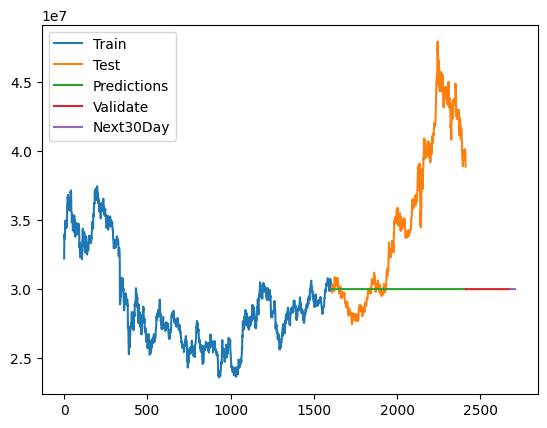

In [81]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price (VND)'])
plt.plot(test_data.index, test_data['Price (VND)'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [82]:
test_data.index

RangeIndex(start=1608, stop=2412, step=1)

### Price_1 7:2:1

In [83]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [84]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_1.csv')
df = df[['Price (VND)']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [85]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price (VND)'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=52191.590, Time=3.75 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=52213.267, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=52191.855, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52191.996, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=52211.300, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=52189.665, Time=2.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=52193.791, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=52193.808, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=52191.597, Time=2.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=52195.220, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=52189.843, Time=1.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=52193.623, Time=2.30 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=52187.736, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=52191.863, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [86]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price (VND)'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price (VND)'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [87]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30094661.35309094 30095779.26654043 30094706.46757859 30095735.97269192
 30094748.01426161 30095696.10266583 30094786.27529392 30095659.3856948
 30094821.51051576 30095625.57242469 30094853.95921838 30095594.43322113
 30094883.84176901 30095565.75660998 30094911.36110755 30095539.34784119
 30094936.70412472 30095515.0275662  30094960.04293128 30095492.63061993
 30094981.53602694 30095472.00489911 30095001.32937668 30095453.01032931
 30095019.55740208 30095435.51791365 30095036.34389425 30095419.40885675
 30095051.80285445 30095404.57375797]


In [88]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 11614181.690089215
Validation MAPE: 38.307790475719436
Validation MAE: 11528818.022612784
Testing RMSE: 9175055.402240913
Testing MAPE: 19.308890772812546
Testing MAE: 7819174.556965694


Validation RMSE: 11614181.690089215
Testing RMSE: 9175055.402240913


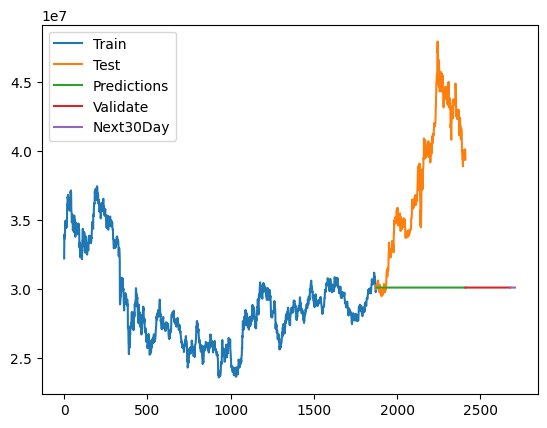

In [89]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price (VND)'])
plt.plot(test_data.index, test_data['Price (VND)'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [90]:
test_data.index

RangeIndex(start=1875, stop=2411, step=1)

### Price_1 8:1:1

In [91]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [92]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_1.csv')
df = df[['Price (VND)']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [93]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price (VND)'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=59798.522, Time=1.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=59812.885, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=59794.047, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=59794.310, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=59810.916, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=59795.593, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=59795.702, Time=0.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=59792.758, Time=2.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=59798.946, Time=1.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=59792.792, Time=2.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=59796.973, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=59801.541, Time=0.81 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=59790.762, Time=1.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=59793.706, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [94]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price (VND)'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price (VND)'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [95]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[34418561.84859069 34436405.6728925  34418537.36441767 34435598.6188792
 34419274.37060018 34434892.02619878 34419950.31833442 34434245.33161262
 34420569.02311517 34433653.40508896 34421135.33037086 34433111.60826932
 34421653.67759458 34432615.69571575 34422128.12647659 34432161.78153266
 34422562.39472639 34431746.30891732 34422959.88520416 34431366.02228931
 34423323.71258502 34431017.94178025 34423656.72776519 34430699.33988404
 34423961.54020111 34430407.72008453 34424240.53835684 34430140.79729316
 34424495.90841962 34429896.47994342]


In [96]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 7341468.42975855
Validation MAPE: 20.93445685681319
Validation MAE: 7207157.161906733
Testing RMSE: 8026027.646968481
Testing MAPE: 18.052311546230854
Testing MAE: 7704909.805078375


Validation RMSE: 7341468.42975855
Testing RMSE: 8026027.646968481


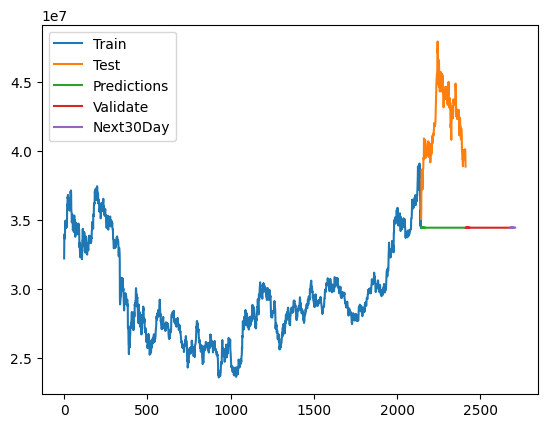

In [97]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price (VND)'])
plt.plot(test_data.index, test_data['Price (VND)'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [98]:
test_data.index

RangeIndex(start=2144, stop=2412, step=1)

## Price_2

### Price_2 6:3:1

In [99]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [100]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_2.csv')
df = df[['GLD']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [101]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['GLD'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5481.929, Time=3.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5489.467, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5489.856, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5489.938, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5487.862, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5490.921, Time=1.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5490.974, Time=1.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5489.912, Time=2.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5490.020, Time=1.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5485.702, Time=0.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5489.127, Time=1.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5489.472, Time=0.74 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5491.902, Time=2.88 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5480.327, Time=1.95 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [102]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1374
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2735.163
Date:                Wed, 21 Jun 2023   AIC                           5480.327
Time:                        03:57:40   BIC                           5506.451
Sample:                             0   HQIC                          5490.102
                               - 1374                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3277      0.038    -34.568      0.000      -1.403      -1.252
ar.L2         -0.9130      0.039    -23.619      0.000      -0.989      -0.837
ma.L1          1.3101      0.035     37.117      0.0

In [103]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['GLD'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['GLD'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [104]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[126.15157264 126.38093592 126.31236651 126.19399668 126.41375352
 126.23006355 126.27330416 126.38360257 126.19768665 126.34381683
 126.31954613 126.21835397 126.37486066 126.25946176 126.26978235
 126.36143808 126.23032873 126.32071549 126.32041479 126.23829194
 126.34759692 126.27745533 126.27078465 126.34367944 126.2529909
 126.30684148 126.31814433 126.25397314 126.32885068 126.28802703]


In [105]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 4.790451296095951
Validation MAPE: 3.0361888072948777
Validation MAE: 3.834554586332916
Testing RMSE: 11.942485816713813
Testing MAPE: 8.899621222741844
Testing MAE: 9.936362182174086


Validation RMSE: 4.790451296095951
Testing RMSE: 11.942485816713813


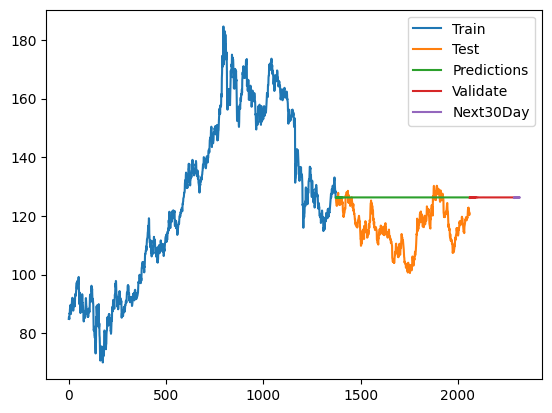

In [106]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['GLD'])
plt.plot(test_data.index, test_data['GLD'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [107]:
test_data.index

RangeIndex(start=1374, stop=2061, step=1)

### Price_2 7:2:1

In [108]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [109]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_2.csv')
df = df[['GLD']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [110]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['GLD'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6262.657, Time=2.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6269.899, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6269.164, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6269.303, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6268.101, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6270.535, Time=1.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6270.568, Time=1.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6266.093, Time=6.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6266.086, Time=3.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6266.041, Time=1.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6269.698, Time=1.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6270.005, Time=0.81 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.76 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6260.863, Time=1.61 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [111]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['GLD'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['GLD'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [112]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[115.59626001 115.6545271  115.5808289  115.62555579 115.63313165
 115.58260123 115.64258846 115.60899338 115.59910853 115.64261179
 115.59401225 115.61890648 115.62998843 115.59278163 115.63196717
 115.61382451 115.6023367  115.6339657  115.6025268  115.61547283
 115.62681951 115.60008368 115.62517705 115.61619412 115.6053515
 115.62783121 115.6079119  115.61390454 115.62401709 115.60521145]


In [113]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 7.897467282645308
Validation MAPE: 6.214930431343194
Validation MAE: 7.185410483982164
Testing RMSE: 7.325488031425719
Testing MAPE: 5.268981600556309
Testing MAE: 5.979768713184623


Validation RMSE: 7.897467282645308
Testing RMSE: 7.325488031425719


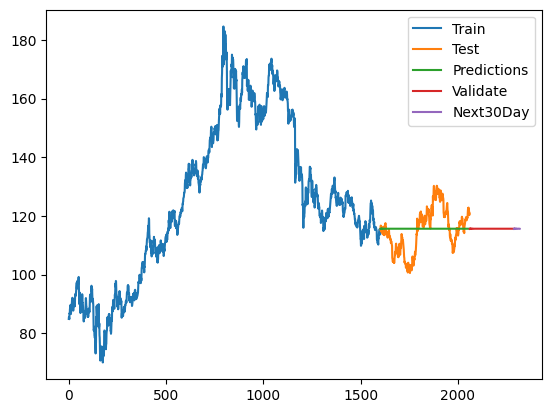

In [114]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['GLD'])
plt.plot(test_data.index, test_data['GLD'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [115]:
test_data.index

RangeIndex(start=1603, stop=2061, step=1)

### Price_2 8:1:1

In [116]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [117]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_2.csv')
df = df[['GLD']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [118]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['GLD'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7028.562, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7030.457, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7029.491, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7029.588, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7028.688, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7026.667, Time=1.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7031.124, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7025.806, Time=1.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7026.657, Time=1.78 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7030.903, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7024.041, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7027.839, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7027.741, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7024.905, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [119]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['GLD'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['GLD'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [120]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[118.9308083  118.7724463  118.9283963  118.77482156 118.92605722
 118.77712501 118.92378885 118.77935883 118.92158906 118.78152512
 118.91945576 118.78362593 118.91738695 118.78566323 118.91538068
 118.78763894 118.91343506 118.78955492 118.91154826 118.79141299
 118.90971849 118.79321489 118.90794404 118.79496232 118.90622323
 118.79665692 118.90455443 118.79830029 118.90293609 118.79989399]


In [121]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 5.132306609841098
Validation MAPE: 3.624598548780085
Validation MAE: 4.307877017802673
Testing RMSE: 5.66214865546852
Testing MAPE: 3.814400592821718
Testing MAE: 4.5758153559852


Validation RMSE: 5.132306609841098
Testing RMSE: 5.66214865546852


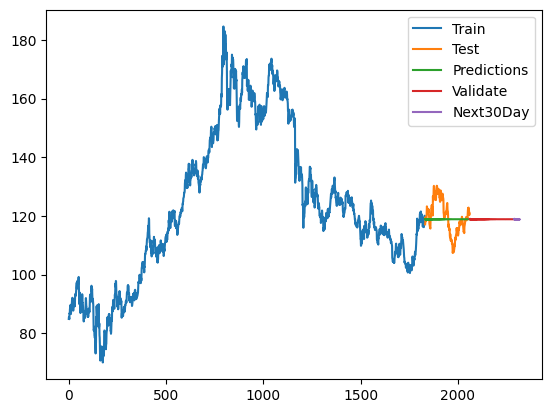

In [122]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['GLD'])
plt.plot(test_data.index, test_data['GLD'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [123]:
test_data.index

RangeIndex(start=1832, stop=2061, step=1)

## Price_3

### Price_3 6:3:1

In [124]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [125]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_3.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [126]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8305.568, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8307.335, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8307.348, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8305.165, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8309.097, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.035 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [127]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1056
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -4151.583
Date:                Wed, 21 Jun 2023   AIC                           8305.165
Time:                        03:58:37   BIC                           8310.127
Sample:                             0   HQIC                          8307.046
                               - 1056                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       153.3055      2.737     56.003      0.000     147.940     158.671
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              4301.69
Prob(Q):                              0.63   Pr

In [128]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [129]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1798.69995117 1798.69995117 1798.69995117 1798.69995117 1798.69995117
 1798.69995117 1798.69995117 1798.69995117 1798.69995117 1798.69995117
 1798.69995117 1798.69995117 1798.69995117 1798.69995117 1798.69995117
 1798.69995117 1798.69995117 1798.69995117 1798.69995117 1798.69995117
 1798.69995117 1798.69995117 1798.69995117 1798.69995117 1798.69995117
 1798.69995117 1798.69995117 1798.69995117 1798.69995117 1798.69995117]


In [130]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 117.9496591260184
Validation MAPE: 5.565193427372019
Validation MAE: 100.10113146076093
Testing RMSE: 80.37440004448791
Testing MAPE: 3.3325658064386356
Testing MAE: 62.46497460567587


Validation RMSE: 117.9496591260184
Testing RMSE: 80.37440004448791


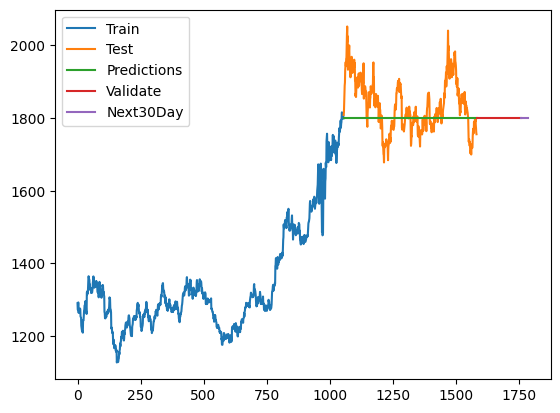

In [131]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [132]:
test_data.index

RangeIndex(start=1056, stop=1584, step=1)

### Price_3 7:2:1

In [133]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [134]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_3.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [135]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10038.970, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10035.213, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10036.882, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10036.908, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10033.925, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10038.287, Time=0.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.923 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [136]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [137]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559
 1712.09997559 1712.09997559 1712.09997559 1712.09997559 1712.09997559]


In [138]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 154.86815714487082
Validation MAPE: 7.247221292678614
Validation MAE: 124.07967398260945
Testing RMSE: 125.9335372547175
Testing MAPE: 5.869328432813288
Testing MAE: 108.8943387811834


Validation RMSE: 154.86815714487082
Testing RMSE: 125.9335372547175


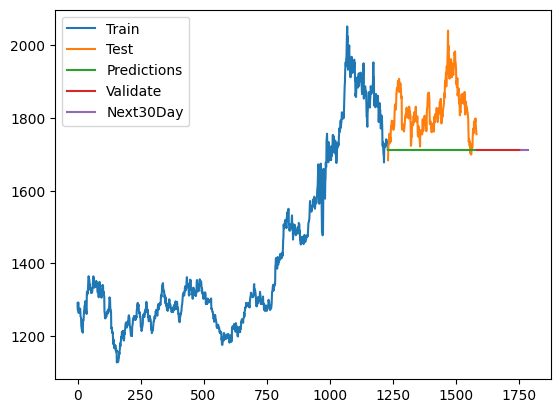

In [139]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [140]:
test_data.index

RangeIndex(start=1232, stop=1584, step=1)

### Price_3 8:1:1

In [141]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [142]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/drive/MyDrive/Study/IS403.N22.HTCL/final project/DATASET/Gold_Price_3.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [143]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11502.468, Time=2.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11513.438, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11515.322, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11515.326, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11512.244, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11514.601, Time=1.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11518.838, Time=0.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11500.458, Time=3.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11512.278, Time=2.76 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11502.448, Time=3.03 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=11502.438, Time=3.78 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=11507.787, Time=1.60 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=11503.721, Time=7.06 sec
 ARIMA(2,1,3)(0,0,0)[0]  

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [144]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [145]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[1776.47026832 1775.42341165 1774.8752204  1774.89375697 1775.40473571
 1776.2102702  1777.0584518  1777.71729857 1778.03428091 1777.96720317
 1777.58175812 1777.02055221 1776.455428   1776.03790285 1775.86120369
 1775.94260164 1776.22824306 1776.61638788 1776.99055548 1777.25248751
 1777.34614129 1777.26741678 1777.05879215 1776.79217845 1776.54604066
 1776.38361276 1776.33789265 1776.40658393 1776.55709927 1776.73903668]


In [146]:
# 7. Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

valid_rmse = np.sqrt(MSE(y_pred_val, y_val))
test_rmse = np.sqrt(MSE(y_test, y_pred))
valid_mape = MAPE(y_pred_val, y_val)*100
test_mape = MAPE(y_test, y_pred)*100
valid_mae = MAE(y_pred_val, y_val)
test_mae = MAE(y_test, y_pred)

print('Validation RMSE:', valid_rmse)
print('Validation MAPE:', valid_mape)
print('Validation MAE:', valid_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Validation RMSE: 122.66270098892399
Validation MAPE: 5.771157861657612
Validation MAE: 102.53871432260146
Testing RMSE: 97.6625289407063
Testing MAPE: 4.1137427854590225
Testing MAE: 77.67617883514085


Validation RMSE: 122.66270098892399
Testing RMSE: 97.6625289407063


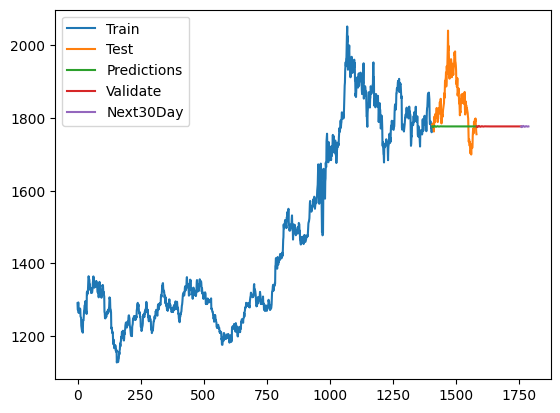

In [147]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [148]:
test_data.index

RangeIndex(start=1408, stop=1584, step=1)